# TD 2 : Machine Learning avec Sklearn
## Préparation des données

Importer le fichier de données (horses.csv) dans un DataFrame pandas.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
horses = pd.read_csv('data/horse.csv')
# Transtypage des variables catégorielles
for col in horses.columns:
    if horses[col].dtype == 'object':
        horses[col] = horses[col].astype('category')
    else:
        horses[col] = horses[col].astype('float64')

In [12]:
horses['age'].cat.categories

Index(['adult', 'young'], dtype='object')

In [13]:
horses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   surgery                299 non-null    category
 1   age                    299 non-null    category
 2   hospital_number        299 non-null    float64 
 3   rectal_temp            239 non-null    float64 
 4   pulse                  275 non-null    float64 
 5   respiratory_rate       241 non-null    float64 
 6   temp_of_extremities    243 non-null    category
 7   peripheral_pulse       230 non-null    category
 8   mucous_membrane        252 non-null    category
 9   capillary_refill_time  267 non-null    category
 10  pain                   244 non-null    category
 11  peristalsis            255 non-null    category
 12  abdominal_distention   243 non-null    category
 13  nasogastric_tube       195 non-null    category
 14  nasogastric_reflux     193 non-null    cat

Appliquer la préparation de données du TD1. (ou utilisez la baseline ci-dessous)

In [14]:
class Nettoyeur_perso():
    def __init__(self, col_a_retirer=None, seuil=0.6) -> None:
        self.col_a_retirer = col_a_retirer
        self.seuil = seuil
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X.drop(self.col_a_retirer,
            axis=1, inplace=True # inplace = True pour que la modification soit faite directement sur le dataframe
            )
        X = X.dropna(thresh=len(X)*self.seuil, axis=1)# Suppression des colonnes avec plus de 60% de valeurs manquantes
        for col in X.columns:
            if X[col].dtype != 'float64':
                X[col] = X.loc[:,col].fillna(X[col].mode()[0])# Remplacement des valeurs manquantes par le mode pour les variables catégorielles mode = valeur la plus fréquente
            else:
                X[col] = X.loc[:,col].fillna(X[col].mean())# Remplacement des valeurs manquantes par la moyenne pour les variables numériques
        return X
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [15]:
imputer = Nettoyeur_perso(col_a_retirer=['surgery', 'hospital_number', 'outcome', 'lesion_1', 
    'lesion_2', 'lesion_3', 'cp_data'],
    seuil=0.6)
horsesClean = imputer.fit_transform(horses)
print(horsesClean.shape)
horsesClean.head()

(299, 18)


,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,surgical_lesion
0,adult,38.5,66.0,28.0,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,none,decreased,distend_large,45.0,8.4,no
1,adult,39.2,88.0,20.0,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,none,absent,other,50.0,85.0,no
2,adult,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,normal,33.0,6.7,no
3,young,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,distend_large,48.0,7.2,yes
4,adult,37.3,104.0,35.0,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,74.0,7.4,no


Il va être être nécessaire d'encoder nos données qualitatives :

Il existe plusieurs méthodes pour encoder des données qualitatives. 


Pour les variables nominales :

* [sklearn.preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

* [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

* ... bien d'autres sur [sklearn.preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)

Pour les variables ordinales :

* [sklearn.preprocessing.OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) pour les variables ordinales.



In [ ]:
from sklearn.compose import ColumnTransformer
FROM 
transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']),
    ('tnf2', OrdinalEncoder(categories=[['Mild', 'Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(sparse=False, drop='first'), ['gender', 'city'])
], remainder='passthrough')

In [16]:
from sklearn.preprocessing import OrdinalEncoder

ordinalColumns = ['temp_of_extremities', 'pain']
nominalColumns = horsesClean.select_dtypes(include='category').columns.drop(ordinalColumns)
horsesEncoded = horsesClean.copy()

# OrdinalEncoder
encoderOrder = OrdinalEncoder(categories=
                             [['cold', 'cool', 'normal', 'warm'],
                               ['alert', 'depressed', 'mild_pain', 'severe_pain', 'extreme_pain']])#attention à l'ordre des catégories

horsesEncoded[ordinalColumns] = encoderOrder.fit_transform(horsesEncoded[ordinalColumns])

# encoder le reste
encodedHorses = pd.get_dummies(horsesEncoded, columns=nominalColumns, drop_first=True)


encodedHorses.info()
encodedHorses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rectal_temp                       299 non-null    float64
 1   pulse                             299 non-null    float64
 2   respiratory_rate                  299 non-null    float64
 3   temp_of_extremities               299 non-null    float64
 4   pain                              299 non-null    float64
 5   packed_cell_volume                299 non-null    float64
 6   total_protein                     299 non-null    float64
 7   age_young                         299 non-null    bool   
 8   peripheral_pulse_increased        299 non-null    bool   
 9   peripheral_pulse_normal           299 non-null    bool   
 10  peripheral_pulse_reduced          299 non-null    bool   
 11  mucous_membrane_bright_red        299 non-null    bool   
 12  mucous_m

,rectal_temp,pulse,respiratory_rate,temp_of_extremities,pain,packed_cell_volume,total_protein,age_young,peripheral_pulse_increased,peripheral_pulse_normal,...,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,surgical_lesion_yes
0,38.5,66.0,28.0,1.0,4.0,45.0,8.4,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,39.2,88.0,20.0,1.0,2.0,50.0,85.0,False,False,True,...,False,True,False,False,False,False,False,False,True,False
2,38.3,40.0,24.0,2.0,2.0,33.0,6.7,False,False,True,...,False,True,False,False,True,False,False,True,False,False
3,39.1,164.0,84.0,0.0,1.0,48.0,7.2,True,False,True,...,False,False,True,False,False,False,False,False,False,True
4,37.3,104.0,35.0,1.0,2.0,74.0,7.4,False,False,True,...,False,True,False,False,False,False,False,False,False,False


Par simplicité, nous allons juger nos différents modèle à travers un validation holdout. Nous allons donc séparer notre jeu de données en deux parties : une partie pour l'entrainement et une partie pour le test.

[sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [17]:
encodedHorses.to_csv('data/horse_clean.csv', index=False)

In [21]:
from sklearn.model_selection import train_test_split

X = encodedHorses.drop('surgical_lesion_yes', axis=1)
y = encodedHorses['surgical_lesion_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209 entries, 224 to 102
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rectal_temp                       209 non-null    float64
 1   pulse                             209 non-null    float64
 2   respiratory_rate                  209 non-null    float64
 3   temp_of_extremities               209 non-null    float64
 4   pain                              209 non-null    float64
 5   packed_cell_volume                209 non-null    float64
 6   total_protein                     209 non-null    float64
 7   age_young                         209 non-null    bool   
 8   peripheral_pulse_increased        209 non-null    bool   
 9   peripheral_pulse_normal           209 non-null    bool   
 10  peripheral_pulse_reduced          209 non-null    bool   
 11  mucous_membrane_bright_red        209 non-null    bool   
 12  mucous_memb

## Construction du modèle

## Apprentissage

#### Arbre de décision

Réalisez un arbre de décision avec la fonction [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) de sklearn.

In [22]:
from sklearn.tree import DecisionTreeClassifier
# max_depth : profondeur maximale de l'arbre
# min_samples_split : nombre minimal d'observations pour pouvoir spliter un noeud
# min_samples_leaf : nombre minimal d'observations pour pouvoir créer un noeud
# splitter : critère de split
# random_state : graine pour la reproductibilité

# On instancie notre modèle
tree = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    splitter='best',
    random_state=42,
    )

# On entraine notre modèle
tree.fit(X_train, y_train)

# On prédit les valeurs de y pour X_test
y_pred = tree.predict(X_test)

##### Visualisation de l'arbre

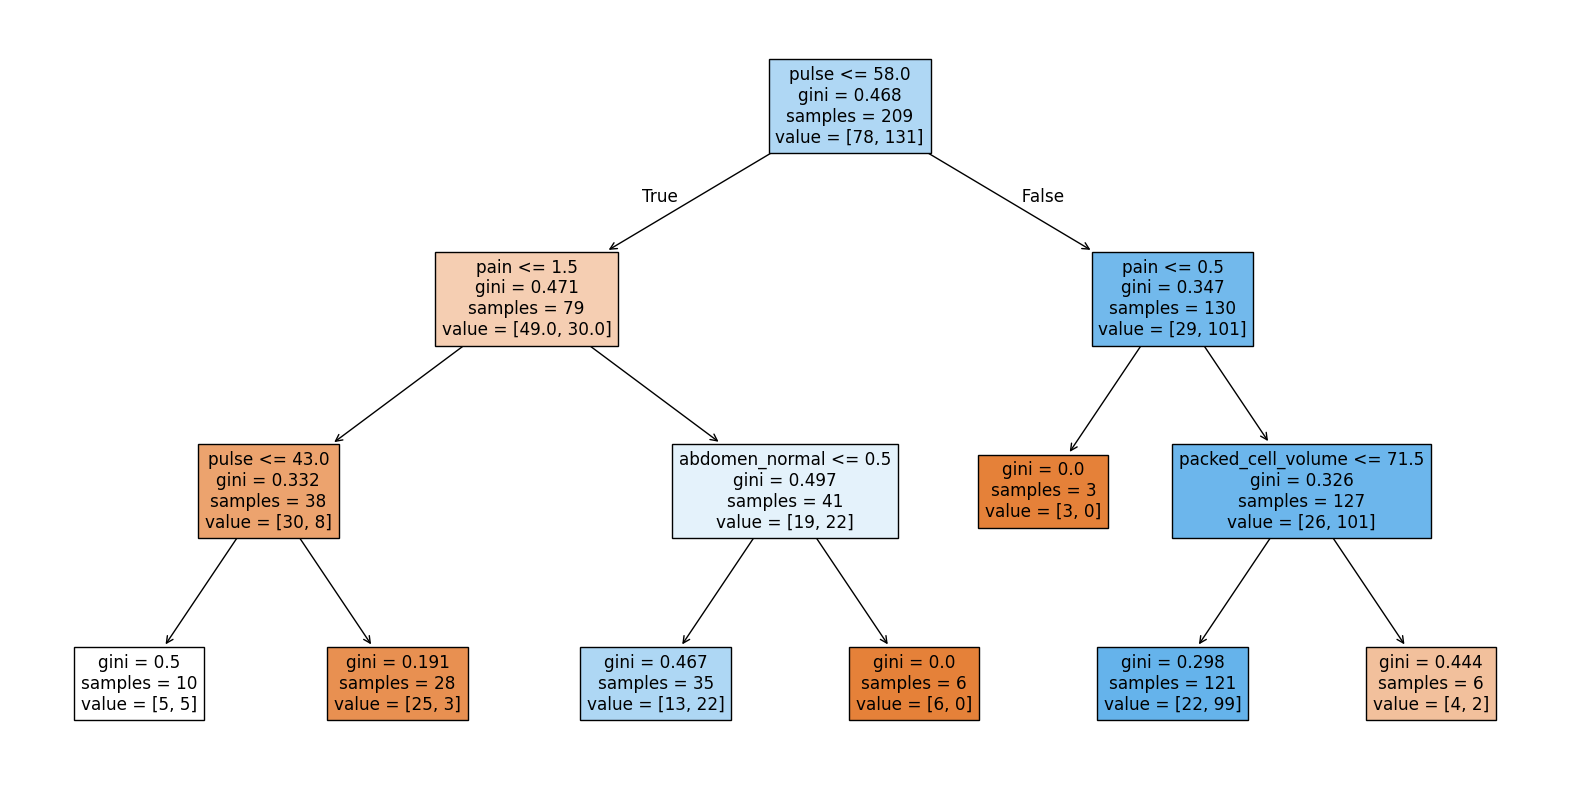

In [23]:
from sklearn.tree import plot_tree

# On affiche l'arbre
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X_train.columns)
plt.show()

##### Evaluation de l'arbre

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("score :",tree.score(X_test, y_test))

# On crée une matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice confusion : \n",cm)

# On affiche le rapport de classification
print(classification_report(y_test, y_pred))

score : 0.7111111111111111
Matrice confusion : 
 [[ 9 22]
 [ 4 55]]
              precision    recall  f1-score   support

       False       0.69      0.29      0.41        31
        True       0.71      0.93      0.81        59

    accuracy                           0.71        90
   macro avg       0.70      0.61      0.61        90
weighted avg       0.71      0.71      0.67        90



#### Bagging (Random Forest)

On va maintenant utiliser un modèle de bagging : le [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Entrainez et évaluez un modèle de Random Forest.

In [25]:
from sklearn.ensemble import RandomForestClassifier

# On crée notre modèle
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            random_state=42)

# On entraine notre modèle
rf.fit(X_train, y_train)

# On prédit les valeurs de la variable cible pour les données de test
y_pred = rf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score,\
    confusion_matrix, classification_report,ConfusionMatrixDisplay
#création d'une fonction d'évaluation

def evaluate_model(model, X_test, y_test):
    # On prédit les valeurs de la variable cible pour les données de test
    y_pred = model.predict(X_test)

    # On calcule l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print('Accuracy: %.2f' % accuracy)

    # On calcule la matrice de confusion
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    # On calcule le rapport de classification

    report = classification_report(y_test, y_pred)
    print(report)    
    return None

Accuracy: 0.77
              precision    recall  f1-score   support

       False       0.81      0.42      0.55        31
        True       0.76      0.95      0.84        59

    accuracy                           0.77        90
   macro avg       0.78      0.68      0.70        90
weighted avg       0.78      0.77      0.74        90



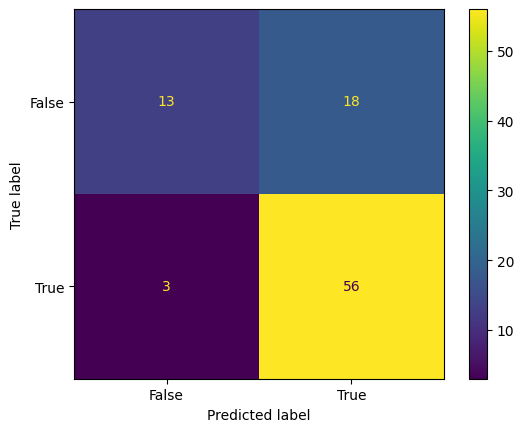

In [27]:
evaluate_model(rf, X_test, y_test)

Bonus : Essayez de faire varier le nombre d'arbres dans le modèle et observez l'impact sur la performance du modèle.

Il est possible de visualiser l'importance des variables dans le modèle.

A l'aide de l'attribut [feature_importances_](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html) de sklearn.

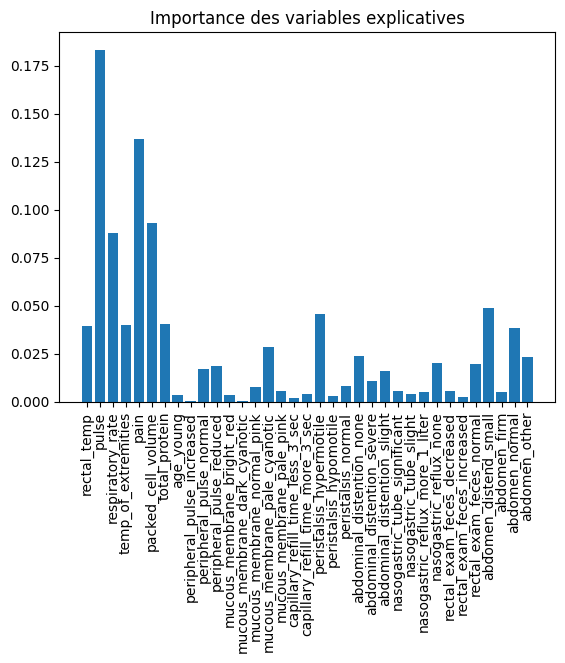

In [28]:
plt.bar(X_train.columns, rf.feature_importances_)
plt.xticks(rotation=90)
plt.title("Importance des variables explicatives")
plt.show() 

Sur sklearn il existe aussi la fonction [permutation_importance](https://scikit-learn.org/stable/modules/permutation_importance.html) qui permet de calculer l'importance des variables.

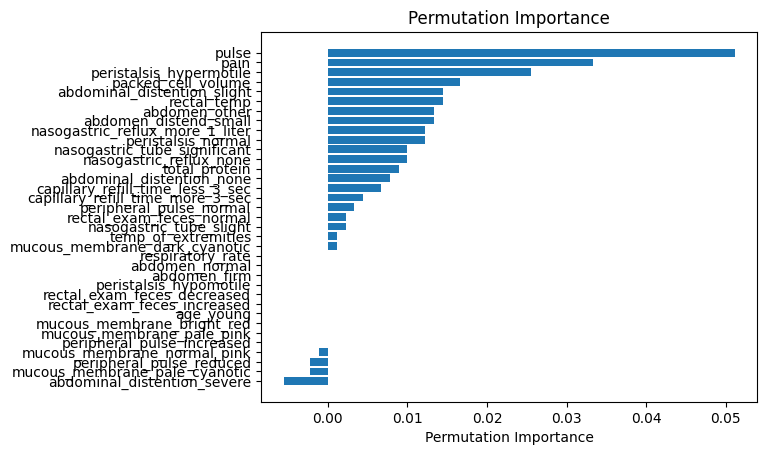

In [29]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, 
                                         X_test, y_test,
                                         n_repeats=10,
                                         random_state=42,
                                         n_jobs=-1)

sorted_idx = perm_importance.importances_mean.argsort()

plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Importance")
plt.show()

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

#### Bagging

On va maintenant utiliser un modèle de bagging : [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).

Accuracy: 0.71
              precision    recall  f1-score   support

       False       0.63      0.39      0.48        31
        True       0.73      0.88      0.80        59

    accuracy                           0.71        90
   macro avg       0.68      0.63      0.64        90
weighted avg       0.70      0.71      0.69        90



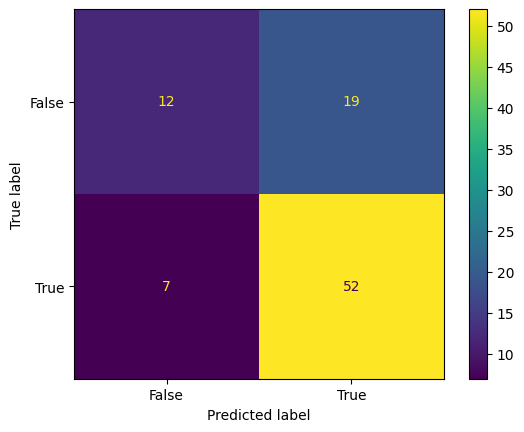

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# On crée notre modèle
bag = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                         n_estimators=100,
                         random_state=42)

# On entraine notre modèle
bag.fit(X_train, y_train)

evaluate_model(bag, X_test, y_test)

#### Boosting (Gradient Boosting)

Entrainez et évaluez un modèle de boosting avec la fonction [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) de sklearn.

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
# On crée notre modèle
gb = GradientBoostingClassifier(n_estimators=100,
                                random_state=42,
                                learning_rate=0.1,
                                max_depth=3,
                                min_samples_split=2,
                                min_samples_leaf=1)

# On entraine notre modèle
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# On prédit les valeurs de la variable cible pour les données de test
print("F1 score Train: ", f1_score(y_train, gb.predict(X_train)))

# On prédit les valeurs de la variable cible pour les données de test
print("F1 score Test: ", f1_score(y_test, y_pred))

F1 score Train:  0.9849624060150376
F1 score Test:  0.8


Evaluation du modèle

Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.63      0.39      0.48        31
           1       0.73      0.88      0.80        59

    accuracy                           0.71        90
   macro avg       0.68      0.63      0.64        90
weighted avg       0.70      0.71      0.69        90



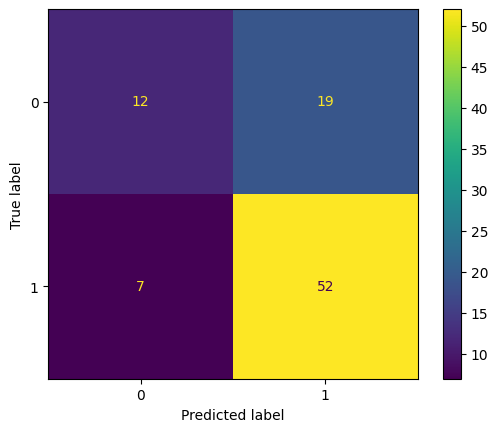

In [36]:
evaluate_model(gb, X_test, y_test)

#### xgboost

Entrainez et évaluez un modèle de boosting avec la fonction [XGBClassifier](https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier) de xgboost.

Accuracy: 0.71
              precision    recall  f1-score   support

       False       0.65      0.35      0.46        31
        True       0.73      0.90      0.80        59

    accuracy                           0.71        90
   macro avg       0.69      0.63      0.63        90
weighted avg       0.70      0.71      0.68        90



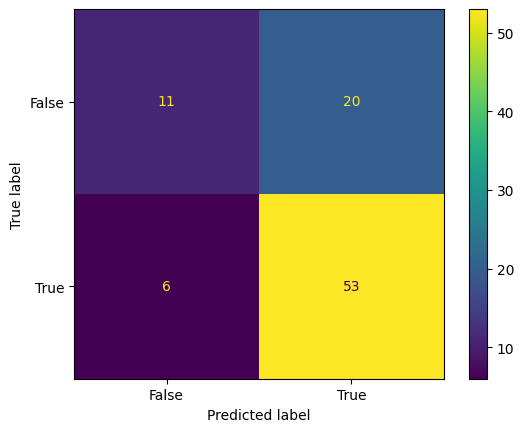

In [ ]:
from xgboost import XGBClassifier

# On crée notre modèle
xgb = XGBClassifier(n_estimators=1000,
                    random_state=42,
                    learning_rate=0.1,
                    max_depth=3)

# On entraine notre modèle
xgb.fit(X_train, y_train)

evaluate_model(xgb, X_test, y_test)

essayez d'autres algorithmes de bagging/boosting:

* [sklearn.ensemble.BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

* [sklearn.ensemble.ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

* [sklearn.ensemble.HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html)